In [3]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.color import rgb2gray
from scipy.ndimage.filters import convolve
from scipy import signal

#### Computing spatial partial derivative Ix

In [4]:
# Calculating gradient along x direction
def xGradient(img1, img2):
    xFilter = np.array([[0, 0, 0],
                        [-1, 0, 1],
                        [0, 0, 0]])
    xFilterImage1 = signal.convolve2d(img1, xFilter, mode = 'same')
    xFilterImage2 = signal.convolve2d(img2, xFilter, mode = 'same')
    Ix = xFilterImage1 + xFilterImage2
    #plt.imshow(Ix, cmap = 'gray')
    return Ix

#### Computing spatial partial derivative Iy

In [5]:
# Calculating grdient along y direction
def yGradient(img1, img2):
    yFilter = np.array([[0, 1, 0],
                        [0, 0, 0],
                        [0, -1, 0]])
    yFilterImage1 = signal.convolve2d(img1, yFilter, mode = 'same')
    yFilterImage2 = signal.convolve2d(img2, yFilter, mode = 'same')
    Iy = yFilterImage1 + yFilterImage2
    #plt.imshow(Iy, cmap = 'gray')
    return Iy

#### Computing temporal partial derivative It

In [6]:
# Calculating temporal partial derivative
def temporalDerivative(img1, img2):
    It = np.subtract(image2, image1)
    #plt.imshow(It, cmap = 'gray')
    return It

### Implementing Lucas-Kanade method for Optical Flow

In [7]:
def lucasKanade(n, image, Ix, Iy, It):
    u = np.zeros(image.shape)
    v = np.zeros(image.shape)
    offset = int((n - 1) / 2)
    for i in range(0, u.shape[0]):
        for j in range(0, u.shape[1]):
            IxPoint = Ix[i - offset : i + offset, j - offset : j + offset].flatten()
            IyPoint = Iy[i - offset : i + offset, j - offset : j + offset].flatten()
            FtPoint = It[i - offset : i + offset, j - offset : j + offset].flatten()
            A = np.vstack((IxPoint, IyPoint)).T
            x = np.matmul(np.matmul(np.linalg.pinv(np.matmul(A.T, A)), A.T), FtPoint)    
            
            u[i, j] = x[0]
            v[i, j] = x[1]
            
    fig1 = plt.figure(figsize = (7,7))
    plt.subplot(1, 2, 1)
    plt.title('Vector u')
    plt.imshow(u, cmap = 'gray')
    plt.subplot(1, 2, 2)
    plt.title('Vector v')
    plt.imshow(v, cmap = 'gray')
    
    return u, v

### Implementing Horn-Schunck method for Optical Flow

In [28]:
def hornSchunck(image, gamma, Ix, Iy, It, k):
    u = np.zeros_like(image)
    v = np.zeros_like(image)
    
    averagingKernel = np.array([[1/12, 1/6, 1/12],
                                [1/6,    0,  1/6],
                                [1/12, 1/6, 1/12]], dtype=np.float32)
    
    for iteration in range(k):
       
        uOld = np.copy(u)
        vOld = np.copy(v)
        
        uBar = cv2.filter2D(uOld.astype(np.float32), -1, averagingKernel)
        vBar = cv2.filter2D(vOld.astype(np.float32), -1, averagingKernel)
        u = uBar - Ix * ((Ix * uBar + Iy * vBar + It)/(gamma**2 + Ix**2 + Iy**2))
        v = vBar - Iy * ((Ix * uBar + Iy * vBar + It)/(gamma**2 + Ix**2 + Iy**2))

    fig1 = plt.figure(figsize = (7,7))
    plt.subplot(1, 2, 1)
    plt.title('Vector u')
    plt.imshow(u, cmap = 'gray')
    plt.subplot(1, 2, 2)
    plt.title('Vector v')
    plt.imshow(v, cmap = 'gray')
    
    return u, v

#### Plotting optical flow as a vector field

In [9]:
def plotVectors(u, v, image):
    subsample = 6
    rows = u.shape[0]
    cols = u.shape[1]
    subU = u[0 : rows : subsample, 0 : cols : subsample]
    subV = v[0 : rows : subsample, 0 : cols : subsample]

    xc = np.linspace(0, cols, subU.shape[1])
    yc = np.linspace(0, rows, subV.shape[0])

    xv, yv = np.meshgrid(xc, yc)

    fig1 = plt.figure(figsize = (7, 7))
    plt.imshow(image, cmap = 'gray')
    plt.title('Optical Flow'), plt.xticks([]), plt.yticks([])
    plt.quiver(xv, yv, subU, subV, color = 'r')

## Synthetic Sphere Images

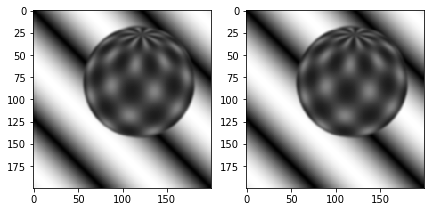

In [10]:
image1 = mpimg.imread('sphere0.png')
image1 = rgb2gray(image1)
image2 = mpimg.imread('sphere1.png')
image2 = rgb2gray(image2)

image1 = cv2.GaussianBlur(image1, (5,5), 0)
image2 = cv2.GaussianBlur(image2, (5,5), 0)

fig = plt.figure(figsize = (7,7))
plt.subplot(1, 2, 1)
plt.imshow(image1, cmap = 'gray')
plt.subplot(1, 2, 2)
plt.imshow(image2, cmap = 'gray')

#### Lucas-Kanade Method for a neigbourhood size of 3

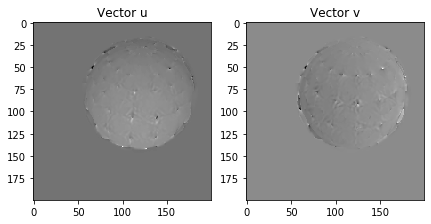

In [15]:
Ix = xGradient(image1, image2)
Iy = yGradient(image1, image2)
It = temporalDerivative(image1, image2)
u, v = lucasKanade(3, image1, Ix, Iy, It)

#### Plot of optical flow as a vector field for a neighbourhood of size 3

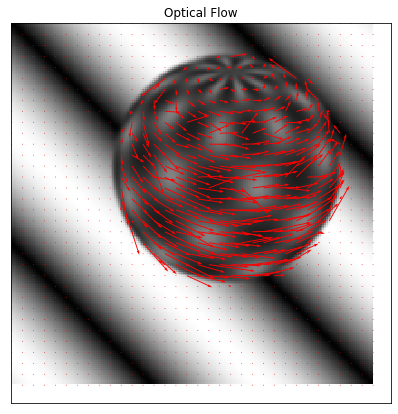

In [16]:
plotVectors(u, v, image1)

#### Lucas-Kanade Method for a neighbourhood size of 5

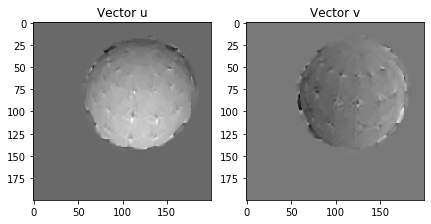

In [17]:
# For a neighbourhood size of 5
Ix = xGradient(image1, image2)
Iy = yGradient(image1, image2)
It = temporalDerivative(image1, image2)
u, v = lucasKanade(5, image1, Ix, Iy, It)

#### Plot of optical flow as a vector field for a neighbourhood size of 5

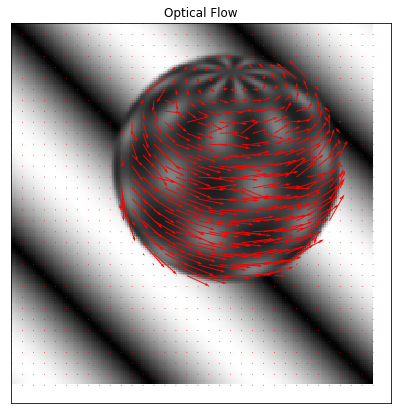

In [18]:
plotVectors(u, v, image1)

#### Lucas-Kanade Method for  a neighbourhood size of 11

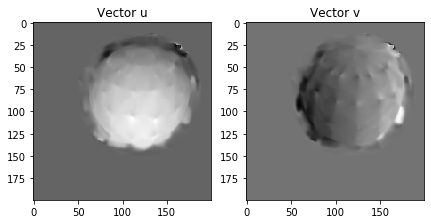

In [19]:
Ix = xGradient(image1, image2)
Iy = yGradient(image1, image2)
It = temporalDerivative(image1, image2)
u, v = lucasKanade(11, image1, Ix, Iy, It)

#### Plot of optical flow as a vector field for a neighbourhood  size of 11

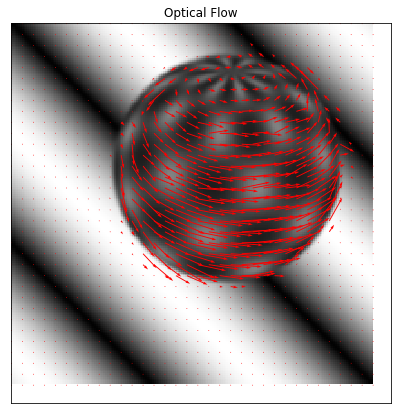

In [20]:
plotVectors(u, v, image1)

#### Lucas-Kanade Method for a neighbourhood size of 21

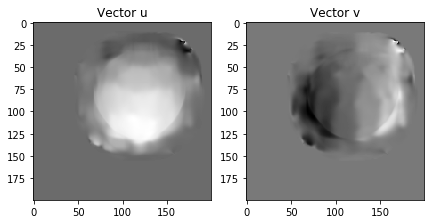

In [22]:
Ix = xGradient(image1, image2)
Iy = yGradient(image1, image2)
It = temporalDerivative(image1, image2)
u, v = lucasKanade(21, image1, Ix, Iy, It)

#### Plot of optical flow as a vector field for a neighbourhood size of 21

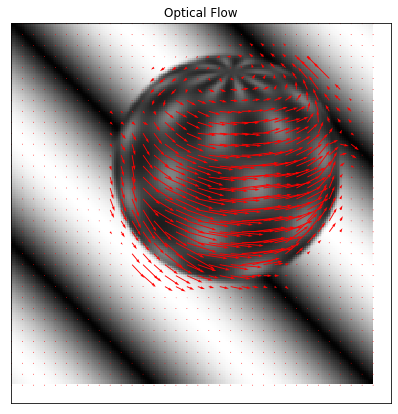

In [23]:
plotVectors(u, v, image1)

#### Horn-Schunck Method using gamma = 100

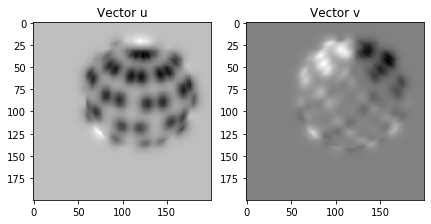

In [29]:
Ix = xGradient(image1, image2)
Iy = yGradient(image1, image2)
It = temporalDerivative(image1, image2)
u, v = hornSchunck(image1, 100, Ix, Iy, It, 100)

#### Plot of optical flow as a vector field for gamma  = 100

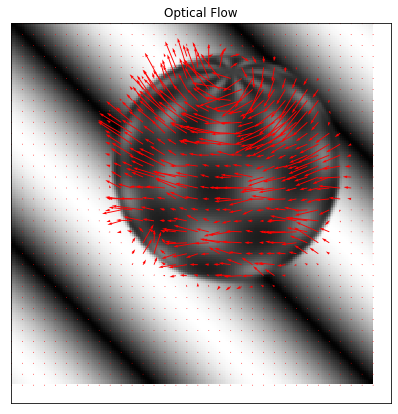

In [30]:
plotVectors(u, v, image1)

#### Horn-Schunck Method using gamma = 10

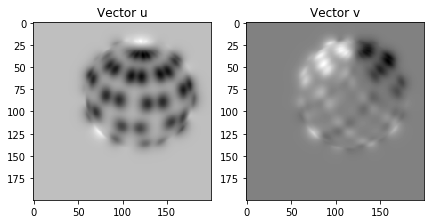

In [32]:
Ix = xGradient(image1, image2)
Iy = yGradient(image1, image2)
It = temporalDerivative(image1, image2)
u, v = hornSchunck(image1, 10, Ix, Iy, It, 100)

#### Plot of optical flow as vector field for gamma = 10

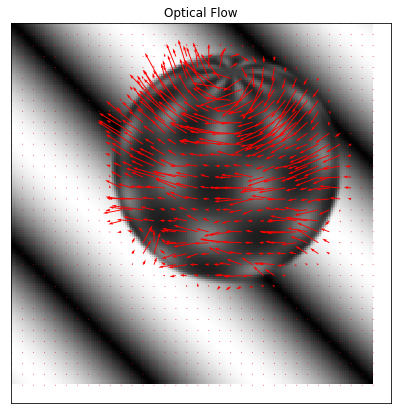

In [33]:
plotVectors(u, v, image1)

#### Horn-Schunck Method using gamma = 1

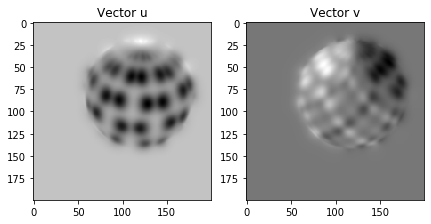

In [35]:
Ix = xGradient(image1, image2)
Iy = yGradient(image1, image2)
It = temporalDerivative(image1, image2)
u, v = hornSchunck(image1, 1, Ix, Iy, It, 100)

#### Plot of optical flow as vector field for gamma = 1

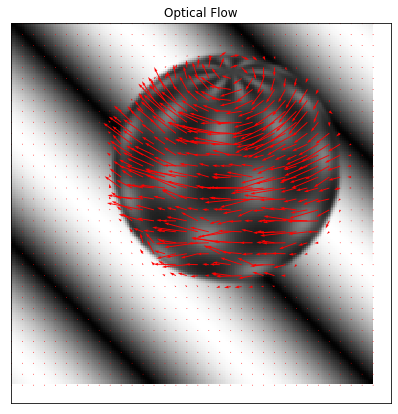

In [36]:
plotVectors(u, v, image1)

#### Horn-Schunck Method using gamma = 0.1

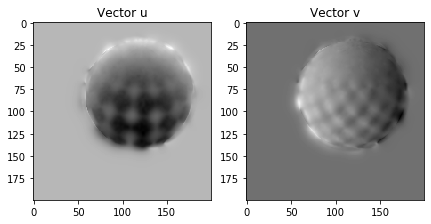

In [41]:
Ix = xGradient(image1, image2)
Iy = yGradient(image1, image2)
It = temporalDerivative(image1, image2)
u, v = hornSchunck(image1, 0.1, Ix, Iy, It, 100)

#### Plot of optical flow as vector field for gamma = 0.1

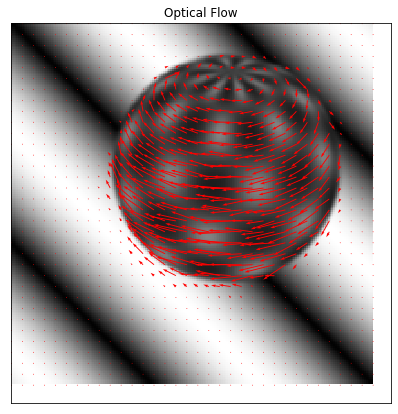

In [42]:
plotVectors(u, v, image1)

## Real Traffic Images

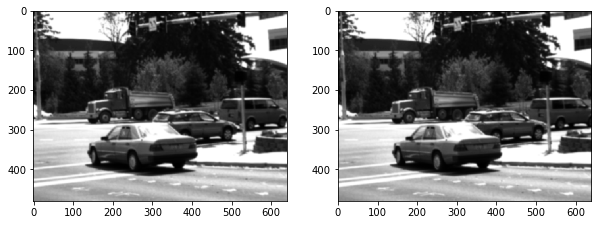

In [46]:
image1 = mpimg.imread('traffic0.png')
image1 = rgb2gray(image1)
image2 = mpimg.imread('traffic1.png')
image2 = rgb2gray(image2)

image1 = cv2.GaussianBlur(image1, (7,7), 0)
image2 = cv2.GaussianBlur(image2, (7,7), 0)

fig = plt.figure(figsize = (10,10))
plt.subplot(1, 2, 1)
plt.imshow(image1, cmap = 'gray')
plt.subplot(1, 2, 2)
plt.imshow(image2, cmap = 'gray')

#### Lucas-Kanade Method for a neigbourhood size of 5

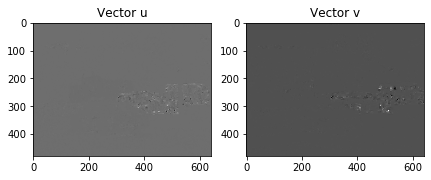

In [47]:
Ix = xGradient(image1, image2)
Iy = yGradient(image1, image2)
It = temporalDerivative(image1, image2)
u, v = lucasKanade(5, image1, Ix, Iy, It)

#### Plot of optical flow as a vector field for a neighbourhood of size 5

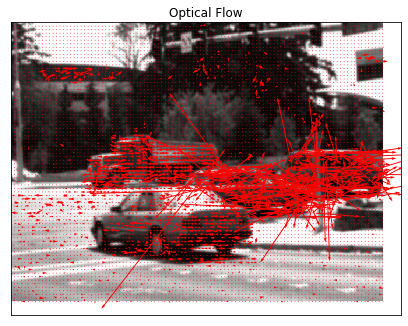

In [50]:
plotVectors(u, v, image1)

#### Lucas-Kanade Method for a neighbourhood size of 11

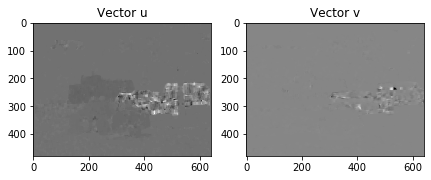

In [51]:
Ix = xGradient(image1, image2)
Iy = yGradient(image1, image2)
It = temporalDerivative(image1, image2)
u, v = lucasKanade(11, image1, Ix, Iy, It)

#### Plot of optical flow as a vector field for a neighbourhood size of 11

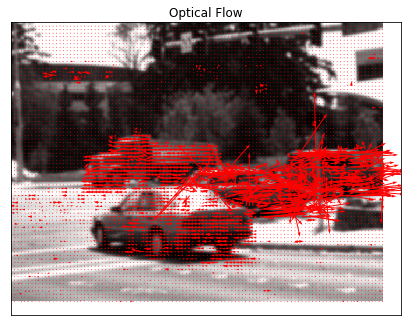

In [42]:
plotVectors(u, v, image1)

#### Lucas-Kanade Method for  a neighbourhood size of 21

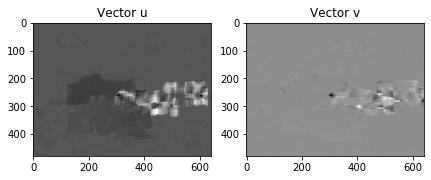

In [43]:
Ix = xGradient(image1, image2)
Iy = yGradient(image1, image2)
It = temporalDerivative(image1, image2)
u, v = lucasKanade(21, image1, Ix, Iy, It)

#### Plot of optical flow as a vector field for a neighbourhood  size of 21

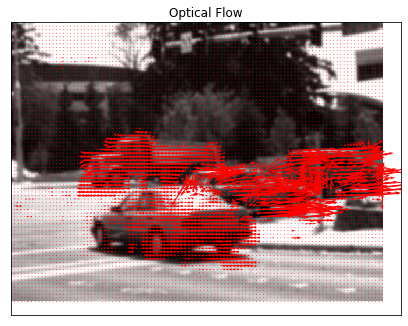

In [44]:
plotVectors(u, v, image1)

#### Lucas-Kanade Method for a neighbourhood size of 29

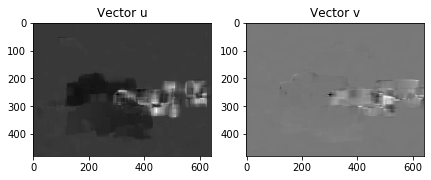

In [76]:
Ix = xGradient(image1, image2)
Iy = yGradient(image1, image2)
It = temporalDerivative(image1, image2)
u, v = lucasKanade(29, image1, Ix, Iy, It)

#### Plot of optical flow as a vector field for a neighbourhood size of 31

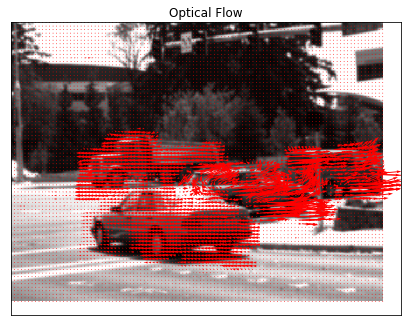

In [77]:
plotVectors(u, v, image1)

#### Horn-Schunck Method using gamma = 100 and k = 100

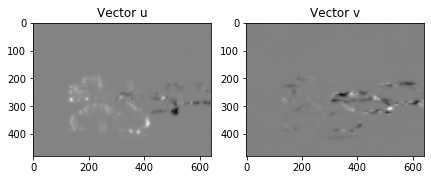

In [79]:
Ix = xGradient(image1, image2)
Iy = yGradient(image1, image2)
It = temporalDerivative(image1, image2)
u, v = hornSchunck(image1, 100, Ix, Iy, It, 100)

#### Plot of optical flow as a vector field for gamma  = 100 and k = 100

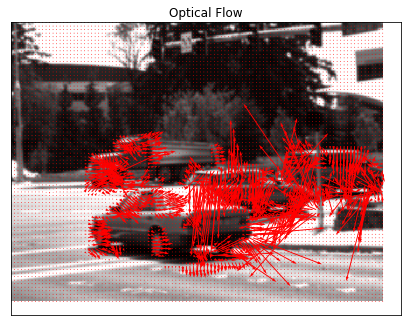

In [80]:
plotVectors(u, v, image1)

#### Horn-Schunck Method using gamma = 0.1 and k = 100

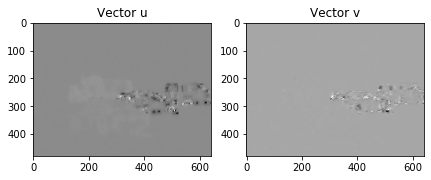

In [81]:
Ix = xGradient(image1, image2)
Iy = yGradient(image1, image2)
It = temporalDerivative(image1, image2)
u, v = hornSchunck(image1, 0.1, Ix, Iy, It, 100)

#### Plot of optical flow as vector field for gamma = 10

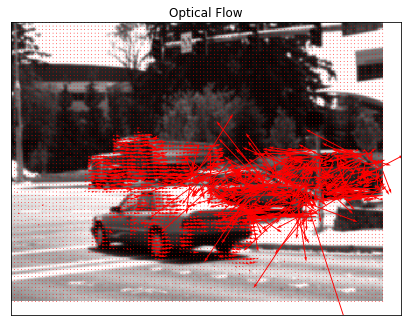

In [82]:
plotVectors(u, v, image1)

#### Horn-Schunck Method using gamma = 0.1 and k = 300

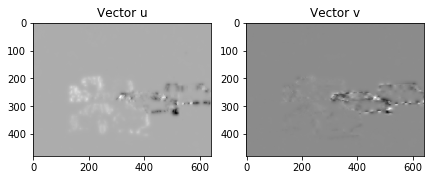

In [83]:
Ix = xGradient(image1, image2)
Iy = yGradient(image1, image2)
It = temporalDerivative(image1, image2)
u, v = hornSchunck(image1, 1, Ix, Iy, It, 100)

#### Plot of optical flow as vector field for gamma = 0.1 and k = 300

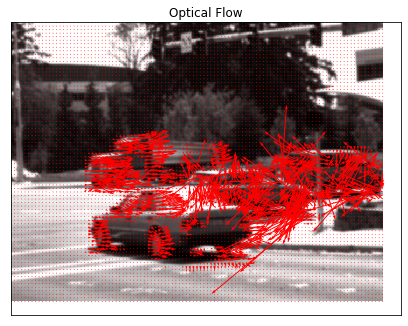

In [84]:
plotVectors(u, v, image1)

#### Horn-Schunck Method using gamma = 0.5 and k = 300

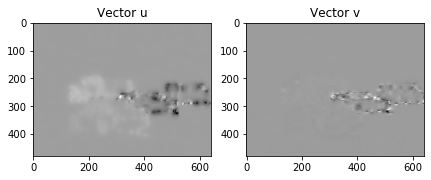

In [89]:
Ix = xGradient(image1, image2)
Iy = yGradient(image1, image2)
It = temporalDerivative(image1, image2)
u, v = hornSchunck(image1, 0.5, Ix, Iy, It, 300)

#### Plot of optical flow as vector field for gamma = 0.5 and k = 300

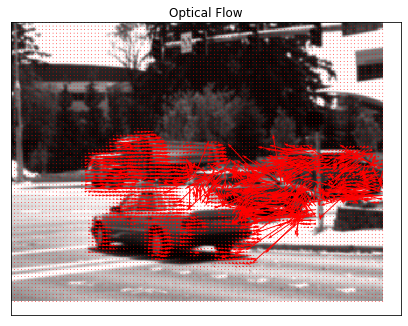

In [88]:
plotVectors(u, v, image1)